## Assignment A2a: Signal Detection

### John Mays (jkm100)

### 1. Generating signals with events and additive noise

### 1a. Signals in Gaussian noise

In [1]:
# Appropriate Imports:
from A2a_code import * 

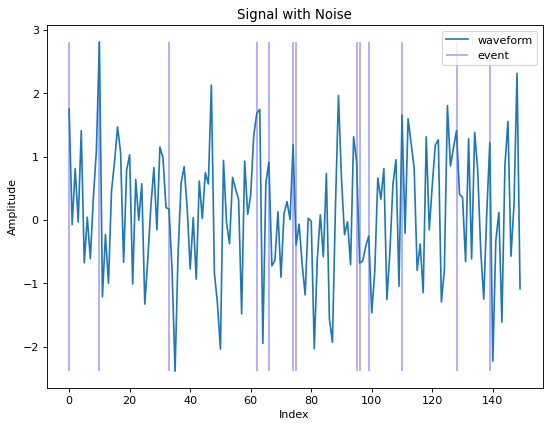

In [2]:
signal, event_locations = genwaveform(N= 150, A=1, alpha=0.1)
plotwaveform(signal, event_locations)

### 1b. Signals in uniform noise

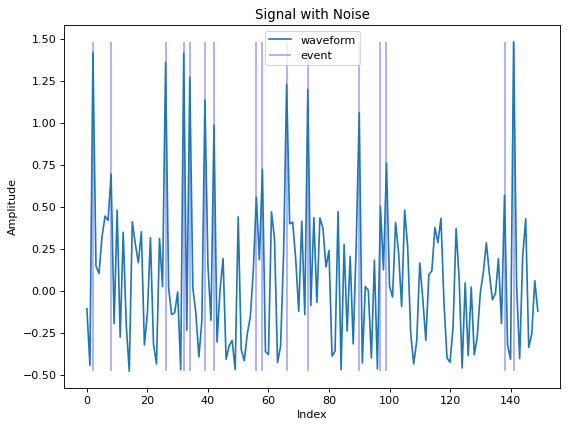

In [3]:
signal, event_locations = genwaveform(N= 150, A=1, alpha=0.1, \
    noisetype="uniform")
plotwaveform(signal, event_locations)

### 1c. Notation

#### 1)
$$X=\{y(\tau_1), y(\tau_2), \dots, y(\tau_N)\}$$

#### 2)
$$p(y(t)) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y(t)-\mu)^{2}}{2\sigma^{2}}}$$

### 1d. Conditional Probability

Given there is a signal present at time $t$ with amplitude $A$, the probability can be expressed as a sum of the pdf of the noise, which I will assume is normal noise here, and the amplitude, $A$:
$$p(y(t)|\text{signal is present}) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y(t)-\mu)^{2}}{2\sigma^{2}}}+A$$
On the other hand, given there is a signal absent, the proability is simply the PDF of the noise without the addition of the amplitude:
$$p(y(t)|\text{signal is absent}) = p(y(t)) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y(t)-\mu)^{2}}{2\sigma^{2}}}$$

## 2. Signal detection


### 2a. Effect of parameters on detection probability


With respect to noise, we must consider
- Noise parameter $\sigma$, the standard deviation
- type of noise

With respect to Gaussian noise specifically, $\sigma$ is important, because it essentially determines the range of values/intensities one is likely to see from noise.  A small $\sigma$ will result in a tighter range of noise values, which will make the signal values stand out more, while a large $\sigma$ can result in a much larger range of noise values that can completely drown out a sigma.

Here is a waveform where the noise has a very small $\sigma$:

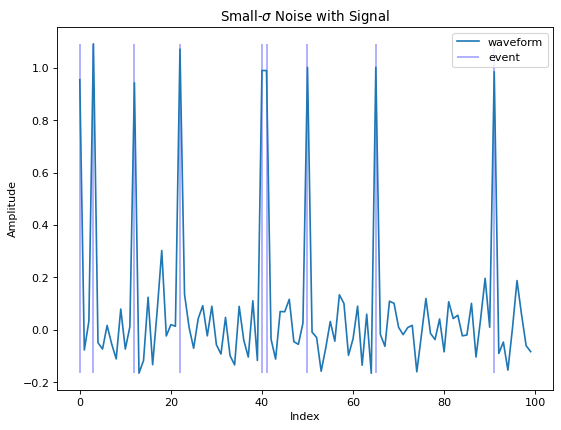

In [4]:
signal_small_sigma, event_locations_small_sigma \
    = genwaveform(N=100, alpha=0.10, sigma=0.1)
plotwaveform(signal_small_sigma, event_locations_small_sigma, \
    title="Small-$\sigma$ Noise with Signal")


Here is a waveform where the noise has a very large $\sigma$ and all of the other parameters are the same:

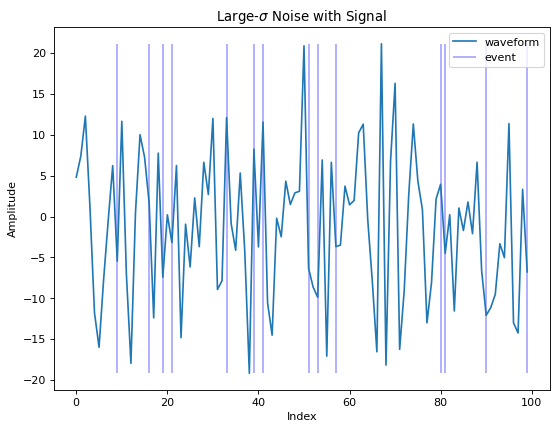

In [5]:
signal_large_sigma, event_locations_large_sigma \
    = genwaveform(N=100, alpha=0.10, sigma=10)
plotwaveform(signal_large_sigma, event_locations_large_sigma, \
    title="Large-$\sigma$ Noise with Signal")

One will notice that in the example with a small $\sigma$, the peaks stand out as very obvious.  In the example with a large $\sigma$, the highest peaks do not even belong to the events.

Therefore a larger $\sigma$ makes a signal less detectable.

$$\boxed{\lim_{\sigma \rightarrow \infty}p(\text{detection})=0\text{, and} \lim_{\sigma \rightarrow 0}p(\text{detection})=1}$$

As for type of noise, it is difficult to make a comparison between uniform noise and Gaussian (normal) noise.  The $\sigma$ parameter controls range on both of them such that as $\sigma$ becomes greater, so does the range, but it does so much differently.  But for the most part, the same observations above would also be just as true with uniform noise.

With respect to the signal, we must consider
- the amplitude of the signal, $A$.
- the signal probability $\alpha$

The amplitude of the signal, $A$, makes the signal much more distinguishable from noise as it becomes larger.  Conversely, as it gets lower, the probability of successful detection becomes lower.

Here are two graphs to illustrate this:

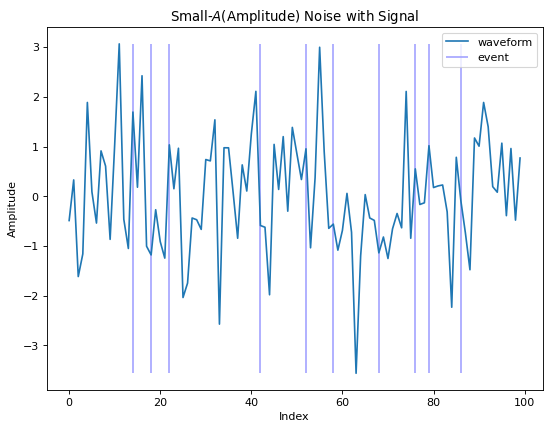

In [6]:
signal_small_amplitude, event_locations_small_amplitude \
    = genwaveform(N=100, alpha=0.10, A = 0.1, sigma=1)
plotwaveform(signal_small_amplitude, event_locations_small_amplitude, \
    title="Small-$A$(Amplitude) Noise with Signal")

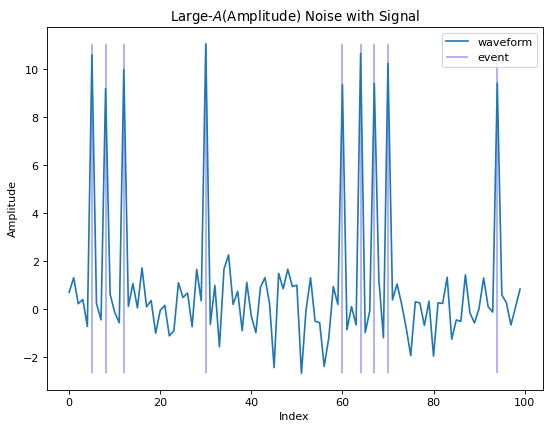

In [7]:
signal_large_amplitude, event_locations_large_amplitude \
    = genwaveform(N=100, alpha=0.10, A = 10.0, sigma=1)
plotwaveform(signal_large_amplitude, event_locations_large_amplitude, \
    title="Large-$A$(Amplitude) Noise with Signal")

The signal events in the waveform with large $A$ are much more distinguishable from the noise than those from the waveform with small $A$.  Therefore,

$$\boxed{\lim_{A \rightarrow 0}p(\text{detection})=0\text{, and} \lim_{A \rightarrow \infty}p(\text{detection})=1}$$

The last parameter to mention is signal probability $\alpha$.  While it could be argued that it does not matter to the detection probability in a lot of scenarions, if the signal is more sparse, and the amplitude of the signal does not necessarily seem out of the typical range for the noise, then if the peaks are more sparse, it would be easier for an algorithm to consistently dismiss them as outliers for the noise distribution.  However, if the signal occurred more often, it might stand out as abnormal to the noise distribution and therefore be detected more often by an algorithm (which would not necessarily only employ thresholding).

### 2b. Types of detections and detection errors

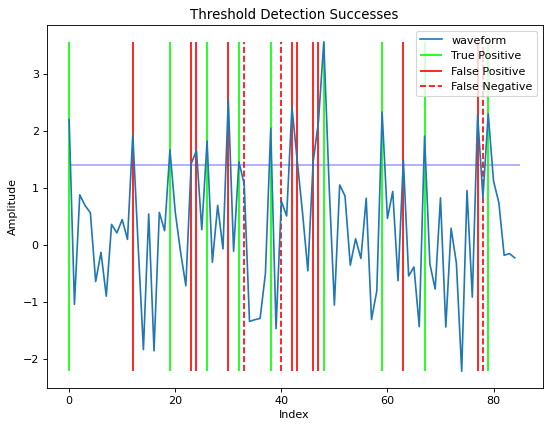

In [8]:
detection_signal, detection_event_locations = genwaveform(N=85, alpha=0.1, A=1.5)
tp, fn, fp, tn = dectectionindices(si=detection_event_locations, y=detection_signal, thresh=1.3)
plotdetectioncounts(detection_signal, thresh=1.4, tp=tp, fn=fn, fp=fp, tn=tn)

### 2c. Detection probabilities

$P(\text{false positive}) = P(\text{signal detected}|\text{signal not present})=$
$$1-\int_{\theta}^{\infty}\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}dy=1-\frac{1}{2}[1+\text{erf}(\frac{\theta-\mu}{\sigma\sqrt{2}})]$$ 

Noting that the distribution is essentiall the Gaussian distribution shifted upwards by 1:

$P(\text{false negative}) = P(\text{signal not detected}|\text{signal present})=$
$$\int_{\theta}^{\infty}\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(y-A)^{2}}{2\sigma^{2}}}dy=1-\frac{1}{2}[1+\text{erf}(\frac{\theta-A}{\sigma\sqrt{2}})]$$ 

In order to find error probabilites, I can run my `detectioncounts()` function a bunch of times and average the probabilities.
- For, false positives, I can take `fp` over the sum of `fp` and `tn`.  
- For false negatives. I can take `fn` over the sum of `fn` and  `tp`.  
- After computing, I can compare it to what `falsepos()` and `falseneg()` return.

In [9]:
print("Estimate False Positive Rate:", falseposestimate(N= 1000, sigma=2.0))
print("True False Positive Rate:", falsepos(sigma=2.0))

Estimate False Positive Rate: 0.31117930659145876
True False Positive Rate: 0.308537538725987


In [10]:
print("Estimate False Negative Rate:", falsenegestimate(N=1000, A=3.0))
print("True False Negative Rate:", falseneg(A=3.0))

Estimate False Negative Rate: 0.02363842244912481
True False Negative Rate: 0.02275013194817921


## ROC curves

### 3a. Threshold considerations

------

*space necessary for proper .pdf rendering unfortunately*

------

*space necessary for proper .pdf rendering unfortunately*

------

*space necessary for proper .pdf rendering unfortunately*

------

*space necessary for proper .pdf rendering unfortunately*

------

*space necessary for proper .pdf rendering unfortunately*

------

*space necessary for proper .pdf rendering unfortunately*

------

Did you mean "optimal"?  There ususally is an optional value for the threshold, which I specify in my function signatures.  Assuming you meant optimal, I would say that it is because one must always trade off false negative errors for false positive errors or the other way around.  Unless the pdfs for the signal and the noise intensities are somehow totally disjoint, there will always have to be some compromise.

Minimizing the total error probability means choosing a threshold value such that the area under the curve characterized by the threshold, the sum of the percent false negative plus percent false positive errors is minimized.  If one wanted to minimize the total number of errors, one would have to inspect the probability of the signal actually showing up among the noise.  For example, if the signal hardly ever appears, picking a threshold eschews false positives in favor for a higher probability of false negatives would further minimize the total number of errors, since there would be less false negatives in the distribution overall.  

The probability of error and number of errors are related, but fundamentally different quantities, and affected by the threshold differently.

### 3b. ROC plot

1.5


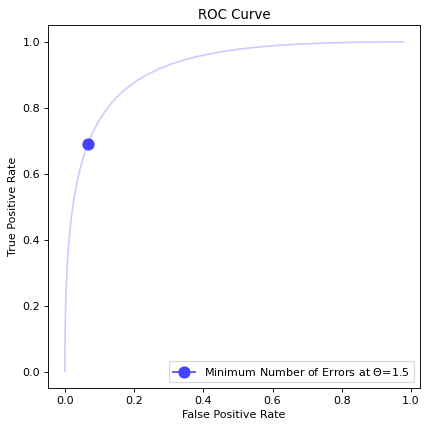

In [11]:
plotROC(sigma=1.0, A=2, alpha=0.25)

------

*space necessary for proper .pdf rendering unfortunately*

------